The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

C:\Users\ricar\AppData\Local\Temp\ipykernel_1320\3167959488.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='count', y=column_name, palette="viridis")


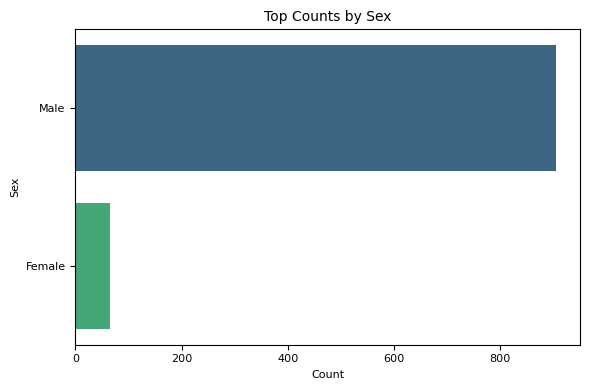

C:\Users\ricar\AppData\Local\Temp\ipykernel_1320\3167959488.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='count', y=column_name, palette="viridis")


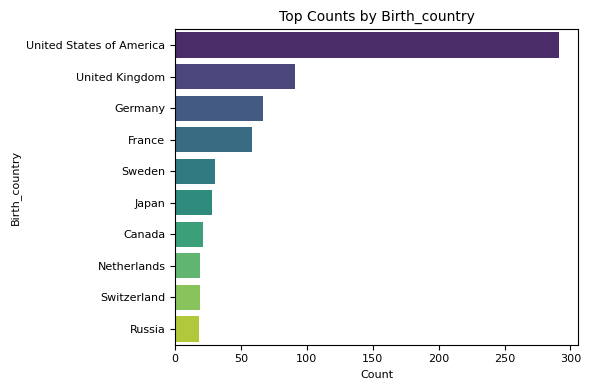

Top gender: Male
Top country: United States of America


In [1]:
# # What is the most commonly awarded gender and birth country?

# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
nobel_df = pd.read_csv('data/nobel.csv')

'''
#Explore initial data
print(nobel_df.head())
print(nobel_df.info())
'''

# Define function to get the value with the max count
import seaborn as sns
import matplotlib.pyplot as plt

# Define function to get the value with the max count and plot the top 10 distribution
def get_max_value_and_plot(df, column_name):
    grouped = (
        df
        .groupby([column_name])
        .size()
        .reset_index(name='count')
        .sort_values(by='count', ascending=False)
    )
    
    # Get the top 10 values (useful for displaying only the top 10 countries)
    top_10 = grouped.head(10)
    
    # Create a seaborn bar plot for the top 10 values (useful for showing only top 10 countries)
    plt.figure(figsize=(6, 4))
    sns.barplot(data=top_10, x='count', y=column_name, palette="viridis")
    plt.title(f"Top Counts by {column_name.capitalize()}", fontsize=10)
    plt.xlabel("Count", fontsize=8)
    plt.ylabel(column_name.capitalize(), fontsize=8)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.tight_layout()
    plt.show()
    
    # Get the value with the highest count
    most_common_value = grouped.loc[grouped['count'].idxmax(), column_name]
    return most_common_value

# Use the function for 'sex' and 'birth_country'
top_gender = get_max_value_and_plot(nobel_df, 'sex')
top_country = get_max_value_and_plot(nobel_df, 'birth_country')

# Print the results
print(f"Top gender: {top_gender}")
print(f"Top country: {top_country}")

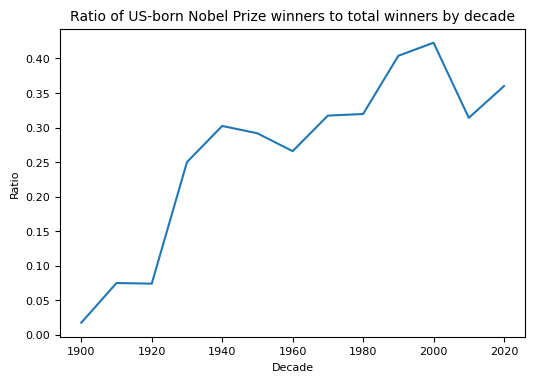

The decade with the highest ratio of US-born winners is: 2000.


In [2]:
# # Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?

# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read CSV
nobel_df = pd.read_csv('data/nobel.csv')


# Get count of distinct 'laureate_id'
total_winners = nobel_df['laureate_id'].nunique()

# Create a new column for the decade
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Filter for US-born winners
nobel_df['is_us_born'] = nobel_df['birth_country'] == 'United States of America'

# Group by decade and calculate counts
nobel_grouped = (
    nobel_df.groupby('decade')
    .agg(
        total_winners=('laureate_id', 'nunique'),
        us_winners=('is_us_born', 'sum')  # Sum the True values to count US-born winners
    )
    .reset_index()
)

# Calculate the ratio of US-born winners to total winners
nobel_grouped['us_ratio'] = nobel_grouped['us_winners'] / nobel_grouped['total_winners']

# Create a seaborn line plot for us_ratio by decades
plt.figure(figsize=(6, 4))
sns.lineplot(nobel_grouped, x='decade', y='us_ratio')
plt.title(f'Ratio of US-born Nobel Prize winners to total winners by decade', fontsize=10)
plt.xlabel("Decade", fontsize=8)
plt.ylabel('Ratio', fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

#Get max decade
max_decade_usa = int(nobel_grouped.loc[nobel_grouped['us_ratio'].idxmax(), 'decade'])

# Print the result
print(f'The decade with the highest ratio of US-born winners is: {max_decade_usa}.')

Decade and category with highest proportion of female laureates:
{2020: 'Literature'}


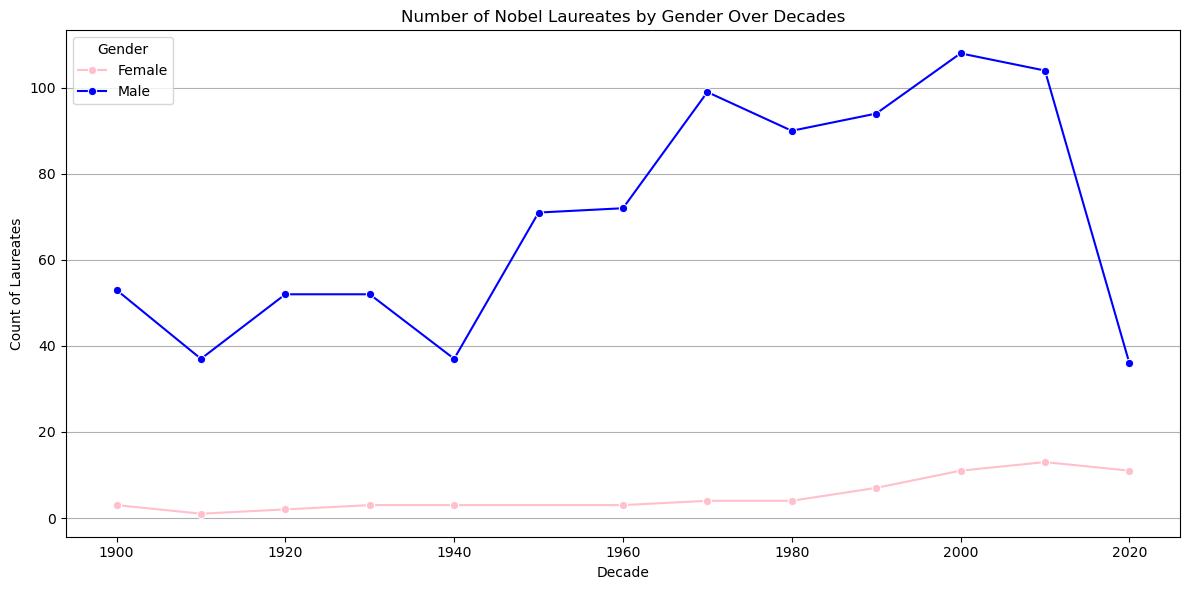

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV
nobel_df = pd.read_csv('data/nobel.csv')

# Drop rows with missing values in the 'sex' column
nobel_df = nobel_df.dropna(subset=['sex'])

# Create a new column for the decade
nobel_df['decade'] = (nobel_df['year'] // 10) * 10

# Create a new column for female laureates
nobel_df['female_winner'] = nobel_df['sex'] == 'Female'

# Group by decade and category to calculate the proportion of female winners
prop_female_winners = nobel_df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()

# Find the row with the highest proportion of female winners, prioritizing the most recent decade
max_female_decade_category = (
    prop_female_winners[prop_female_winners['female_winner'] == prop_female_winners['female_winner'].max()]
    .sort_values(by='decade', ascending=False)  # Sort by decade to prioritize the most recent
    .iloc[0]  # Take the first row after sorting
)

# Create a dictionary with the decade and category pair
max_female_dict = {
    max_female_decade_category['decade']: max_female_decade_category['category']
}

# Print the result
print("Decade and category with highest proportion of female laureates:")
print(max_female_dict)


# --- Visualization: Male and Female Laureates Over Decades ---

# Group by decade and sex to calculate the count of laureates
sex_decade_grouped = (
    nobel_df.groupby(['decade', 'sex'])
    .size()
    .reset_index(name='count')
)

# Define custom color palette
custom_palette = {'Male': 'blue', 'Female': 'pink'}  # Assign specific colors to genders

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=sex_decade_grouped,
    x='decade',
    y='count',
    hue='sex',
    marker='o',
    palette=custom_palette
)

# Customize the plot
plt.title('Number of Nobel Laureates by Gender Over Decades')
plt.xlabel('Decade')
plt.ylabel('Count of Laureates')
plt.legend(title='Gender', loc='upper left')
plt.grid(axis='y')
plt.tight_layout()

# Show the plot
plt.show()

The first woman to receive a Nobel Prize was Marie Curie, née Sklodowska in the category of Physics.


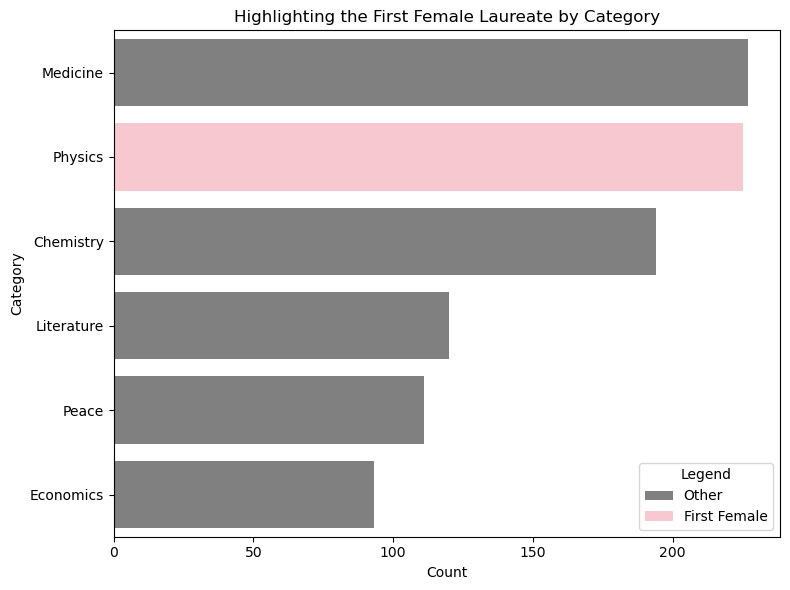

In [4]:
## Who was the first woman to receive a Nobel Prize, and in what category?
## Visualize all categories won by female laureates and how the first compares to the others

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV
nobel_df = pd.read_csv('data/nobel.csv')

# Drop rows with missing values in the 'sex' column
nobel_df = nobel_df.dropna(subset=['sex'])

# Filter for female laureates
female_laureates = nobel_df[nobel_df['sex'] == 'Female']

# Sort by year to find the first woman
first_woman = female_laureates.sort_values(by='year').iloc[0]

# Extract her name and category
first_woman_name = first_woman['full_name']
first_woman_category = first_woman['category']

# Print the results
print(f"The first woman to receive a Nobel Prize was {first_woman_name} in the category of {first_woman_category}.")

# Visualization:

# Count total laureates by category
total_by_category = nobel_df['category'].value_counts().reset_index()
total_by_category.columns = ['category', 'count']

# Highlight the first laureate's category
total_by_category['highlight'] = total_by_category['category'].apply(
    lambda x: 'First Female' if x == first_woman_category else 'Other'
)

# Create the bar plot with hue
plt.figure(figsize=(8, 6))
sns.barplot(
    data=total_by_category,
    x='count',
    y='category',
    hue='highlight',
    dodge=False,
    palette={'First Female': 'pink', 'Other': 'gray'}
)
plt.title('Highlighting the First Female Laureate by Category')
plt.xlabel('Count')
plt.ylabel('Category')
plt.legend(title='Legend')
plt.tight_layout()
plt.show()


Individuals or organizations with more than one Nobel Prize:
['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Frederick Sanger', 'John Bardeen', 'Linus Carl Pauling', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


C:\Users\ricar\AppData\Local\Temp\ipykernel_1320\2938247172.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


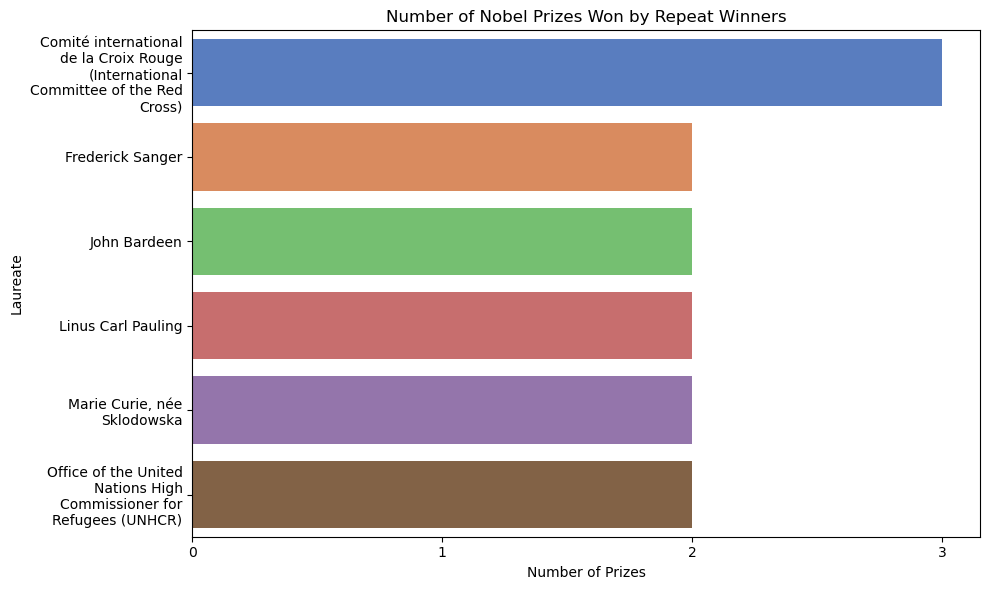

In [5]:
## Which individuals or organizations have won more than one Nobel Prize throughout the years?
## Create a visualization to display the information 

import pandas as pd
import matplotlib.pyplot as plt
import textwrap
import matplotlib.ticker as ticker 

# Read CSV
nobel_df = pd.read_csv('data/nobel.csv')

# Group by full_name and count occurrences of Nobel Prizes
repeat_winners = (
    nobel_df.groupby('full_name')
    .size()
    .reset_index(name='prize_count')
)

# Filter for those with more than one prize
repeat_winners = repeat_winners[repeat_winners['prize_count'] > 1]

# Extract the names into a list
repeat_list = repeat_winners['full_name'].tolist()

# Print the result
print("Individuals or organizations with more than one Nobel Prize:")
print(repeat_list)


# For visualization:

# Wrap text for y-axis labels
repeat_winners['full_name_wrapped'] = repeat_winners['full_name'].apply(
    lambda x: '\n'.join(textwrap.wrap(x, width=20))
)

# Create a bar plot with wrapped y-axis labels
plt.figure(figsize=(10, 6))
sns.barplot(
    data=repeat_winners,
    x='prize_count',
    y='full_name_wrapped',
    palette='muted'
)

# Customize the plot
plt.title('Number of Nobel Prizes Won by Repeat Winners')
plt.xlabel('Number of Prizes')
plt.ylabel('Laureate')

# Ensure x-axis ticks are integers only
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.tight_layout()
plt.show()
